In [1]:
import lattice_models as lm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

Internal energy of polymer: 3


<IPython.core.display.Javascript object>


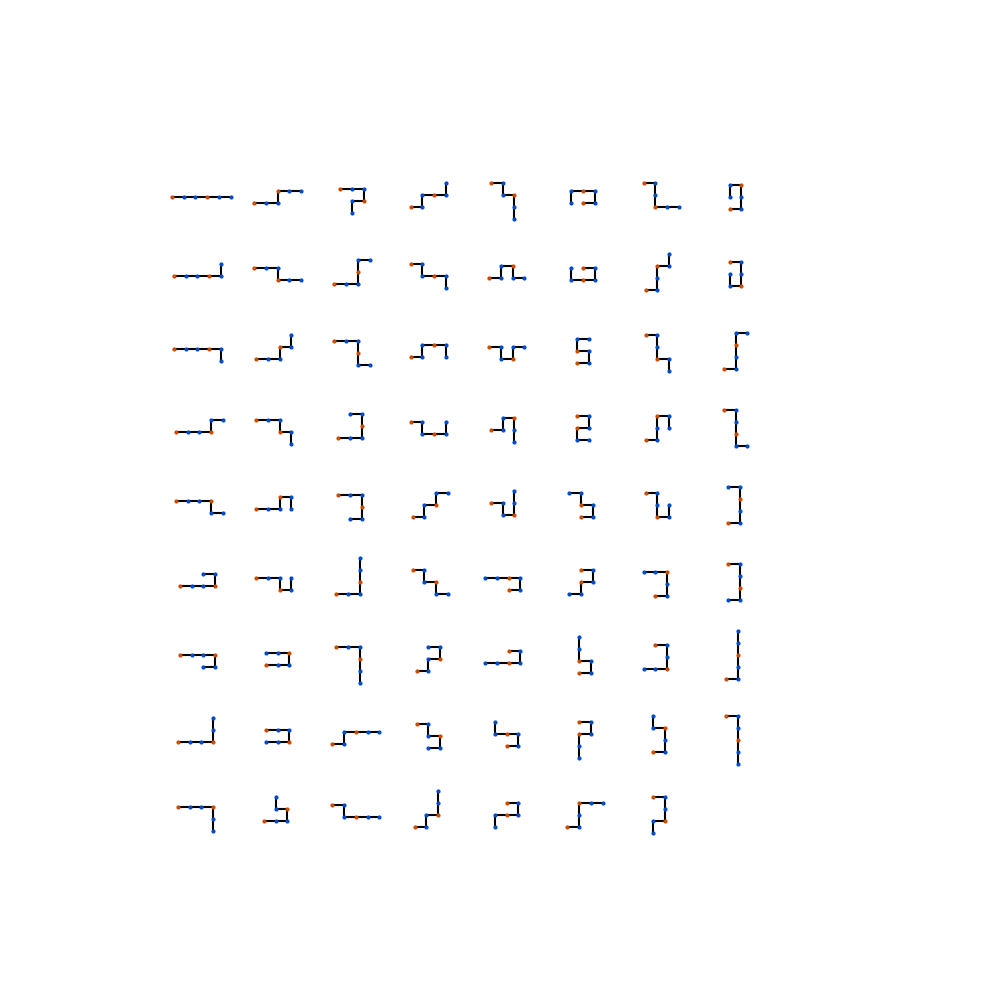

In [2]:
p = lm.polymer("HPPHPP")         # define the polymer

p.determine_conformations()      # determine conformations

# compute energy
print("Internal energy of polymer:", p.energy())

#remove redundant conformations
v = lm.remove_rotational_redundance(p.conformations)

# show conformations
lm.show_conformations_redundant(p, v)

Energy of cavity : 5
Energy of polymer: 3


<IPython.core.display.Javascript object>


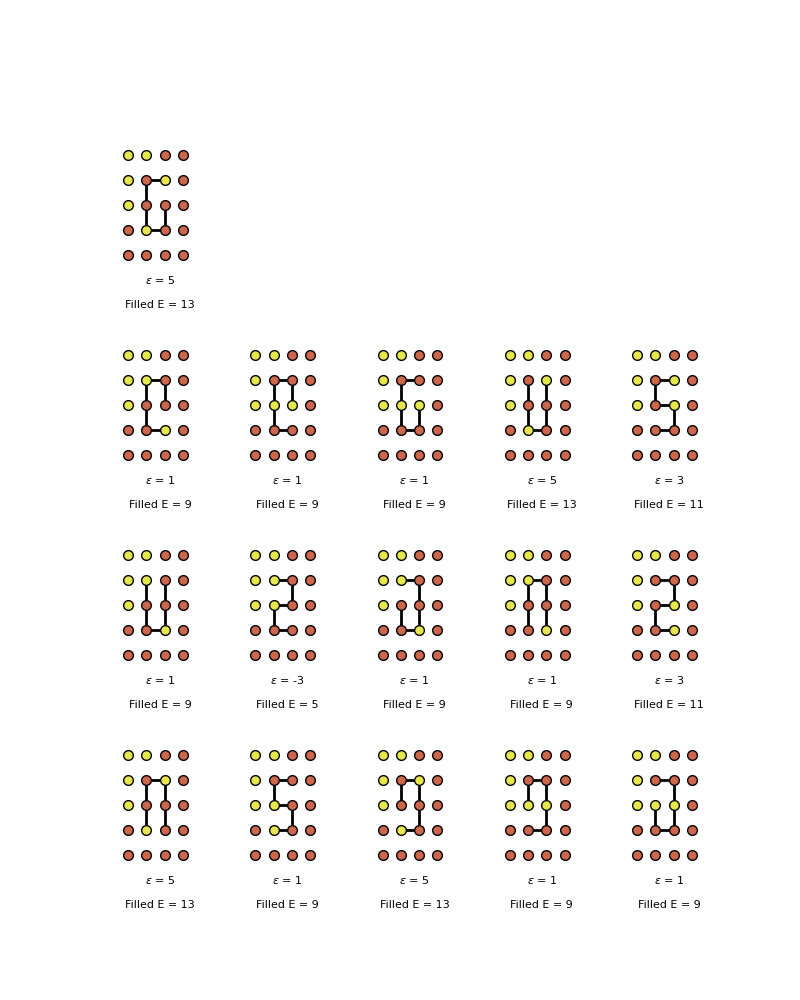

In [3]:
l = lm.lattice()
l.lattice = np.array([[1, 1, 0, 0, 0],
                      [1,-1,-1, -1, 0],
                      [1,-1,-1, -1, 1],
                      [1, 1, 1, 1, 1]])

# print some energies
print("Energy of cavity :", l.energy())
print("Energy of polymer:", p.energy())

# determine all explicit cartesian coordinates for possible placements
placements = l.find_all_possible_placements(p)

# make a lattice with the polymer placed
lat = l.lattice*1 # make a copy
lat[placements[14][:,0], placements[14][:, 1]] = [l._edict[k] for k in p.config] #place polymer


#print("Energy of first possible placement:", l.energy(lat))

# show all possible placements
lm.show_lattice_placement(l,p,placements)

<IPython.core.display.Javascript object>


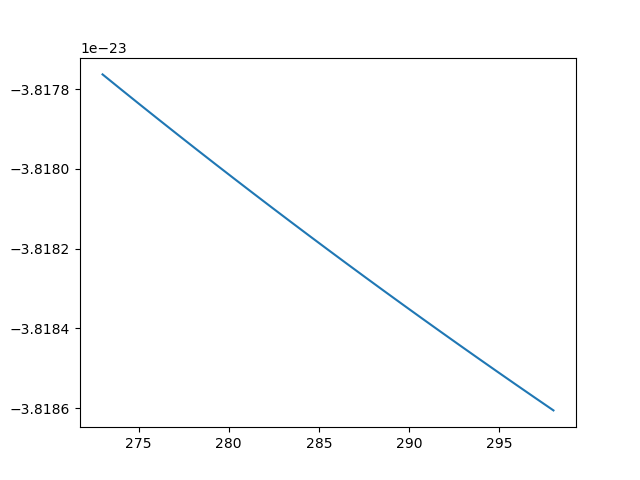

In [5]:
k = 1.3806e-23
T = np.linspace(273,298,25)

def S(T):
    Q = np.exp(3/T) + 9*np.exp(-1/T) + 2*np.exp(-3/T) + 4*np.exp(-5/T)
    return -k*np.log(Q)

plt.figure()
plt.plot(T,S(T))
plt.show()